In [2]:
import pandas as pd
import numpy as np
import dash_core_components as dcc
import dash
import dash_html_components as html

#### data cleaning

In [3]:
df = pd.read_csv("topline_metrics.csv")
df.head()

,Date,Date.1,Platform,Country,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
0,2018-03-15,2018-03-15,Android(All),Kazakhstan(哈萨克斯坦),628852.81,15498.31,43429.11,3428.09,17.58,1.3,2.3,4527.01,79.12,58.18
1,2018-03-15,2018-03-15,ALL,United States(美国),633293.54,19939.05,43429.11,3428.09,17.58,1.3,2.3,4527.01,75.65,58.87
2,2018-03-15,2018-03-15,Android(All),Kazakhstan(哈萨克斯坦),628852.81,15498.31,43429.11,3428.09,17.58,1.3,2.3,4527.01,79.12,58.18
3,2018-03-15,2018-03-15,ALL,Guatemala(危地马拉),628976.03,15621.54,43429.11,3428.09,17.58,1.3,2.3,4527.01,74.62,46.21
4,2018-03-15,2018-03-15,Android(All),Belarus(白俄罗斯),629154.54,15800.04,43429.11,3428.09,17.58,1.3,2.3,4527.01,76.97,56.92


In [4]:
# Remove df['Date.1'], because it is same as df['Date']
del df['Date.1']

In [5]:
# set datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Get the unique rows in a DataFrame
df = df.drop_duplicates()

In [7]:
#Convert Country in Chinese in case we need in the future
df['Country_Chinese'] = [x.split('(')[1][:-1] if len(x.split('('))>1 else x for x in df['Country'] ]

In [8]:
# convert df['Country'] in english
import re 

df['Country'] = df['Country'].apply(lambda x: re.sub(r'\(.*?\)', '', x))
# set(df.Country.values)
# see is there any chinese character, if there is then we convert them in english;
# there are a few country only contain chinese characters, therefore we create a dictionary to translate them back to english
mapping_dic = {'厄立特里亚':'Eritrea',
               '图瓦卢':'Tuvalu',
               '圣卢西亚':'Saint Lucia',
               '圣巴泰勒米':'Saint Barths',
               '基里巴斯':'Kiribati',
               '托克劳':'Tokelau',
               '朝鲜':'North Korea',
               '根西岛':'Guernsey',
               '瓦利斯和富图纳':'Wallis et Futuna',
               '瓦努阿图':'Vanuatu',
               '福克兰群岛':'Falkland Islands',
               '科摩罗':'Comores',
               '美属萨摩亚':'American Samoa',
               '萨摩亚':'Samoa',
               '蒙塞拉特岛':'Montserrat',
               '诺福克岛':'Norfolk Island',
               '马约特':'Mayotte',
               '英属印度洋领地':'British Indian Ocean Territory',
               '英属维尔京群岛':'British Virgin Islands'
                }
df['Country_English'] = [x if x not in mapping_dic else mapping_dic[x] for x in df['Country']]

In [9]:
#del useless features
del df['Country']

## Task2 
Use Anomaly Detection methodologies to detect anomaly from the attached data. 

In [10]:
## only include numerical features in dataset
detectOutlier = df[df.columns.tolist()[0:-2]]

In [11]:
detectOutlier.head()

,Date,Platform,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
0,2018-03-15,Android(All),628852.81,15498.31,43429.11,3428.09,17.58,1.3,2.3,4527.01,79.12,58.18
1,2018-03-15,ALL,633293.54,19939.05,43429.11,3428.09,17.58,1.3,2.3,4527.01,75.65,58.87
3,2018-03-15,ALL,628976.03,15621.54,43429.11,3428.09,17.58,1.3,2.3,4527.01,74.62,46.21
4,2018-03-15,Android(All),629154.54,15800.04,43429.11,3428.09,17.58,1.3,2.3,4527.01,76.97,56.92
5,2018-03-15,Android(All),628648.96,15294.47,43429.11,3428.09,17.58,1.3,2.3,4527.01,127.37,101.95


#### First we will do some EDA base on the dataset
See how data are distributed

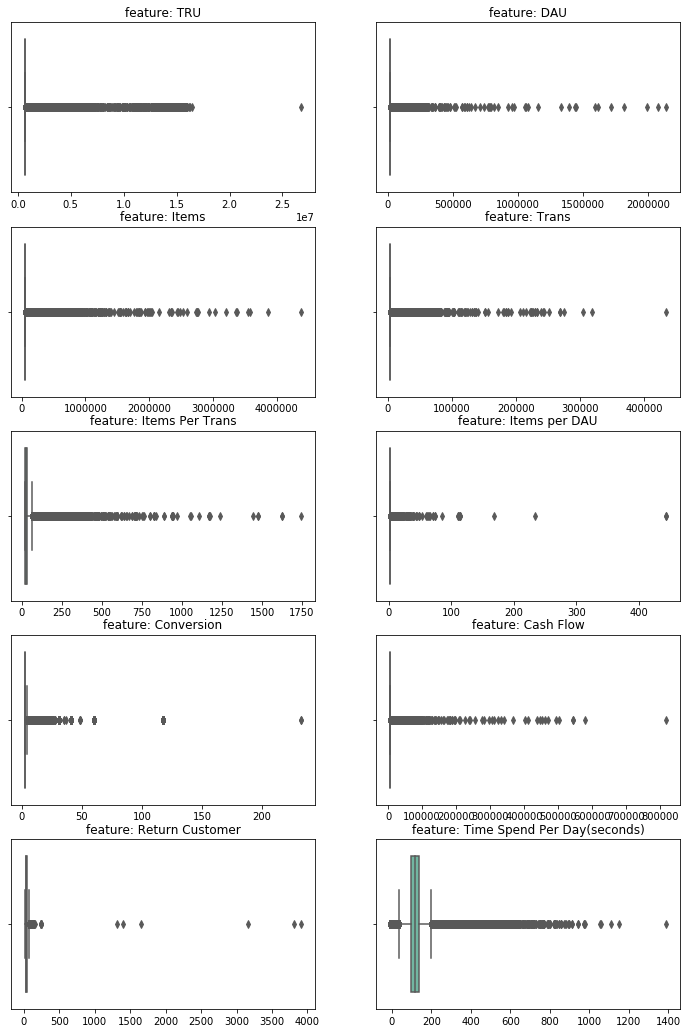

In [12]:
#box plot
#explore all feature distribution
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(30, 2)
for i, cn in enumerate(detectOutlier.iloc[:,2:]):
    ax = plt.subplot(gs[i])
    sns.boxplot(detectOutlier[cn], orient="h", palette="Set2")
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

In [12]:
#Check feature integrety

#daily active user must less than total active user
print(sum(detectOutlier['DAU']/detectOutlier['TRU']>1))

0


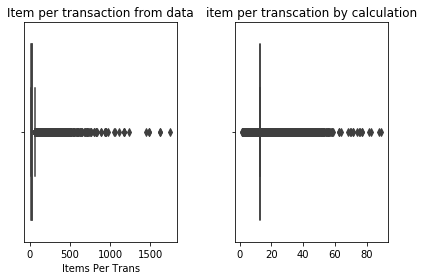

In [13]:
#Item per transaction from data
plt.subplot(1, 2, 1)
sns.boxplot(detectOutlier['Items Per Trans'])
plt.title('Item per transaction from data')
#item per transcation by calculation
plt.subplot(1, 2, 2)
sns.boxplot(detectOutlier['Items']/detectOutlier['Trans'])
plt.title('item per transcation by calculation')
plt.tight_layout()

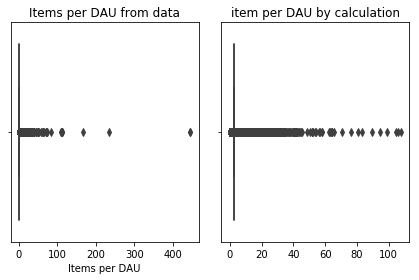

In [14]:
## Item per transaction from data
plt.subplot(1, 2, 1)
sns.boxplot(detectOutlier['Items per DAU'])
plt.title('Items per DAU from data')
#item per transcation by calculation
plt.subplot(1, 2, 2)
sns.boxplot(detectOutlier['Items']/detectOutlier['DAU'])
plt.title('item per DAU by calculation')
plt.tight_layout()

#### Feature Engineering

In [15]:
detectOutlier.head()

,Date,Platform,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
0,2018-03-15,Android(All),628852.81,15498.31,43429.11,3428.09,17.58,1.3,2.3,4527.01,79.12,58.18
1,2018-03-15,ALL,633293.54,19939.05,43429.11,3428.09,17.58,1.3,2.3,4527.01,75.65,58.87
3,2018-03-15,ALL,628976.03,15621.54,43429.11,3428.09,17.58,1.3,2.3,4527.01,74.62,46.21
4,2018-03-15,Android(All),629154.54,15800.04,43429.11,3428.09,17.58,1.3,2.3,4527.01,76.97,56.92
5,2018-03-15,Android(All),628648.96,15294.47,43429.11,3428.09,17.58,1.3,2.3,4527.01,127.37,101.95


In [16]:
## difference between provided data and self calc item per dau
detectOutlier['Item per DAU Difference'] = (detectOutlier['Items']/detectOutlier['DAU'])-detectOutlier['Items per DAU']

## difference between provided data and self calc item per trans
detectOutlier['Item per Transcation Difference'] = (detectOutlier['Items']/detectOutlier['Trans'])-detectOutlier['Items Per Trans']

## time spend per day in mins
detectOutlier['Time Spend Per Day(mins)'] = detectOutlier['Time Spend Per Day(seconds)']//60

## time spend per day in hours
detectOutlier['Time Spend Per Day(hours)'] = detectOutlier['Time Spend Per Day(mins)']//60

##date variables: month
detectOutlier['month'] = detectOutlier['Date'].dt.month

##date variables:
detectOutlier['dayofyear'] = detectOutlier['Date'].dt.dayofyear

##date variables day of week
detectOutlier['dayofweek'] = detectOutlier['Date'].dt.dayofweek

## one-hot encoding
detectOutlier = pd.get_dummies(detectOutlier, drop_first=True)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [17]:
del detectOutlier['Date']

#### Modelling

Here we will use isolation forest to detect outlier. Isolation forest is very robust compare to kmeans or LOF. The main idea, which is different from other popular outlier detection methods, is that Isolation Forest explicitly identifies anomalies instead of profiling normal data points. Like any tree ensemble method, isolation forest is built on the basis of decision trees. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature. In this case it will automatically do a feature engineering, and as it is a tree-based model, it is robust to different scale of feature.

In [13]:
""" Use IsolationForest"""
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

#set variable
lendata = detectOutlier.shape[0]

#sit normalize limited
nmlz_a = -1
nmlz_b = 1

#it is not necessary for isolation forest, but we will still do it here in case we need to change to any other algorithm
def normalize(dataset,a,b):
    scaler = MinMaxScaler(feature_range=(a, b))
    normalize_data = scaler.fit_transform(dataset)
    return normalize_data

#read dataset x,y
x = normalize(detectOutlier, nmlz_a, nmlz_b)


ifm = IsolationForest(n_estimators=100, verbose=2, n_jobs=2,
                      max_samples=lendata, random_state=2020)

ifm.fit(x)

# The anomaly score of the input samples. The lower, the more abnormal
# The anomaly score of the input samples. The lower, the more abnormal.
scores_pred = ifm.decision_function(x)
y_pred_train = ifm.predict(x)

In [19]:
sum(scores_pred<0)

1178

In [20]:
# Normal data indexs
normal = [i for i in range(len(scores_pred)) if scores_pred[i] >= 0]
# Outlier data indexs
outlier = [i for i in range(len(scores_pred)) if scores_pred[i] < 0]

print(" Number of dataset：",lendata)
print(" Number of anomal samples：",lendata - len(normal))

 Number of dataset： 387287
 Number of anomal samples： 1178


In [21]:
detected = detectOutlier.iloc[outlier,:].reset_index(drop=True)

In [22]:
detected.head()

,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds),Item per DAU Difference,Item per Transcation Difference,Time Spend Per Day(mins),Time Spend Per Day(hours),month,dayofyear,dayofweek,Platform_Android(All),Platform_IOS(All)
0,628647.81,15293.32,43429.11,3428.09,17.58,1.3,2.3,4527.01,12.21,-9.99,1.539744,-4.911397,-1.0,-1.0,3,74,3,0,0
1,628647.81,15293.32,43429.11,3428.09,17.58,1.3,2.3,4527.01,12.21,-9.99,1.539744,-4.911397,-1.0,-1.0,3,74,3,1,0
2,628648.96,15294.47,43429.11,3428.09,17.58,1.3,2.3,4527.01,12.21,-2.74,1.539530,-4.911397,-1.0,-1.0,3,74,3,0,0
3,628647.81,15293.32,43429.11,3428.09,17.58,1.3,2.3,4527.01,12.21,-8.50,1.539744,-4.911397,-1.0,-1.0,3,74,3,0,0
4,628648.96,15294.47,43429.11,3428.09,17.58,1.3,2.3,4527.01,12.21,-2.74,1.539530,-4.911397,-1.0,-1.0,3,74,3,1,0


In [23]:
sum(detected['Platform_Android(All)']==1)/len(detected)

0.3769100169779287

In [24]:
sum(detected['Platform_IOS(All)']==1)/len(detected)

0.2623089983022071

In [25]:
1-0.3769100169779287-0.2623089983022071

0.3607809847198642

In [26]:
df.Platform.value_counts()/len(df.Platform)

ALL             0.336872
Android(All)    0.334204
IOS(All)        0.328924
Name: Platform, dtype: float64

Findings:
* 1) Time logging error. Some of the time spend per day in the outiers are negative,which is quite obvious that they are outliers, as there is no possibility of spending negative amount of time at the platform. Need to communicate with engineers who are responsible for the time logging.
* 2) All the the 'Item per transcation difference' in the dataset are negative, which means that the manually calcuated item per transcation is less than the provided dataset, some of the value differences even greater than 100. Need to communicate with someone who are responsible for the metric calculation, to see if there is anything missing from the dataset.
* 3) More outliers exist in Android platform and 'ALL' platform, especially android, there are about 33% rows of data recorded as android platform; however 37% of the outliers are from Android based on the outlier detection.

## Task3 
Clustering/prediction models based on the attached dataset. 

## Clustering
We can do a customer profiling based on the data. For example, by grouping by data based on country, and cluster data to see how data perform in different country.

In [27]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [28]:
# Get normal data
Normal_data = df.iloc[normal,:].reset_index(drop=True)
Normal_data.head()

,Date,Platform,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds),Country_Chinese,Country_English
0,2018-03-15,Android(All),628852.81,15498.31,43429.11,3428.09,17.58,1.3,2.3,4527.01,79.12,58.18,哈萨克斯坦,Kazakhstan
1,2018-03-15,ALL,633293.54,19939.05,43429.11,3428.09,17.58,1.3,2.3,4527.01,75.65,58.87,美国,United States
2,2018-03-15,ALL,628976.03,15621.54,43429.11,3428.09,17.58,1.3,2.3,4527.01,74.62,46.21,危地马拉,Guatemala
3,2018-03-15,Android(All),629154.54,15800.04,43429.11,3428.09,17.58,1.3,2.3,4527.01,76.97,56.92,白俄罗斯,Belarus
4,2018-03-15,Android(All),628648.96,15294.47,43429.11,3428.09,17.58,1.3,2.3,4527.01,127.37,101.95,加纳,Ghana


In [29]:
""" Categorical encoding  """
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Assigning numerical values for Platform
Platform_types = Normal_data['Platform'].value_counts().keys().tolist()
Normal_data['Platform'] = labelencoder.fit_transform(Normal_data['Platform'])

#final dataset before clustering
Normal_data = Normal_data.drop('Country_Chinese',axis = 1)

#group by country
Normal_data = Normal_data.groupby(['Country_English']).mean()

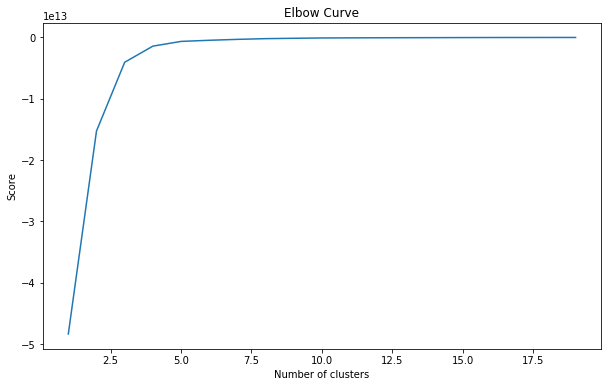

In [30]:
#apply kmeans cluster
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(Normal_data) for i in n_cluster]
scores = [kmeans[i].score(Normal_data) for i in range(len(kmeans))]

#elbow method to choose the best number of clusters
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [31]:
km = KMeans(n_clusters=5)
km.fit(Normal_data)
km.predict(Normal_data)
labels = km.labels_

#label the dataset
Normal_data['Label'] = labels

In [32]:
Normal_data.head()

,Platform,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds),Label
Country_English,,,,,,,,,,,,
Afghanistan,0.999400,648472.491404,15704.251008,44633.467894,3500.578980,41.344313,1.402867,2.789328,4635.142364,55.949886,163.910294,0
Albania,1.004788,655541.245410,16025.730431,43850.052424,3460.028354,31.104034,1.312083,2.404159,4556.606002,44.023214,109.754638,0
Algeria,0.995244,753527.730565,18540.174067,45596.373977,3597.045696,37.145285,1.320476,2.421552,4702.131576,48.650357,141.808240,4
American Samoa,0.995196,628678.154873,15292.751716,43432.365992,3428.369842,20.191373,1.409300,3.178785,4527.228126,26.318518,176.529369,0
Andorra,0.983491,628779.860195,15299.983196,43439.369310,3428.608874,24.794210,1.404511,2.819505,4527.697954,31.996327,88.983160,0


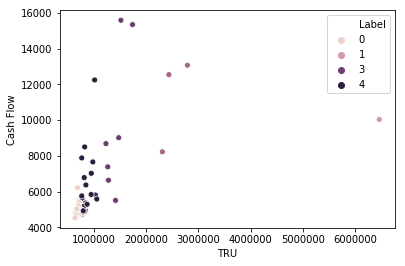

In [33]:
ax = sns.scatterplot(x='TRU', y='Cash Flow',
                     hue='Label', data=Normal_data)

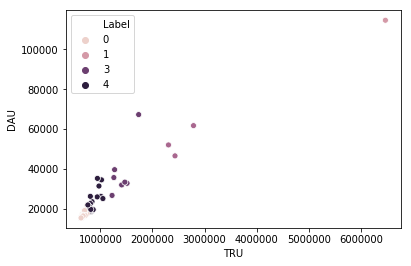

In [34]:
ax = sns.scatterplot(x='TRU', y='DAU',
                     hue='Label', data=Normal_data)

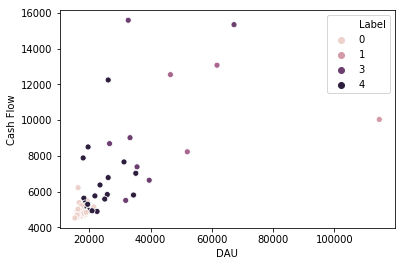

In [35]:
ax = sns.scatterplot(x='DAU', y='Cash Flow',
                     hue='Label', data=Normal_data)

Text(0.5, 0.92, 'K - Means')

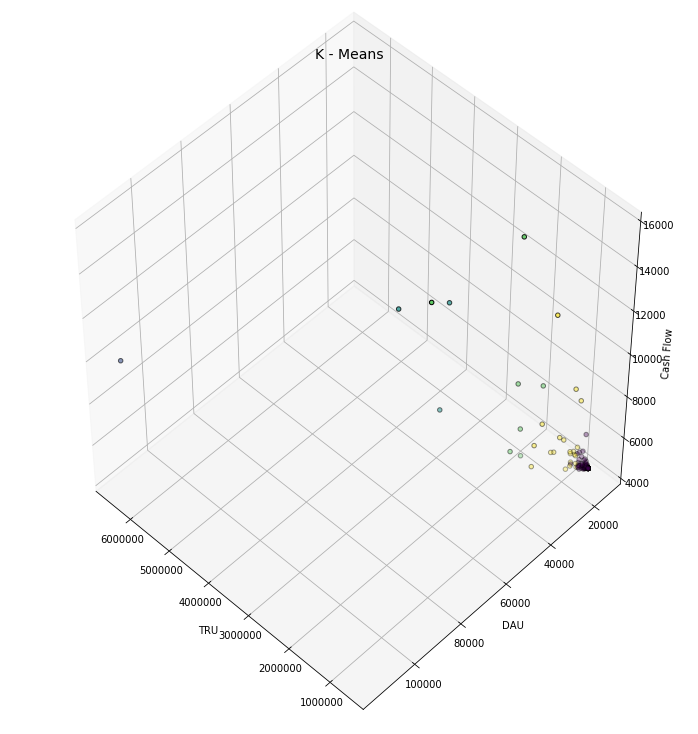

In [36]:
# Plot the distribution of data by TRU,DAU,cashflow
fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(Normal_data.iloc[:,1],Normal_data.iloc[:,2],Normal_data.iloc[:,8], c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("TRU")
ax.set_ylabel("DAU")
ax.set_zlabel("Cash Flow")
plt.title("K - Means", fontsize=14)

In [37]:
Normal_data = Normal_data.reset_index()

In [38]:
Normal_data[Normal_data.Label == 0]['Country_English'].tolist()

['Afghanistan',
 'Albania',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'British Indian Ocean Territory',
 'British Virgin Islands',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central Africa',
 'Chad',
 'Chile',
 'Colombia',
 'Comores',
 'Congo',
 'Congo )',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech',
 'Côte dIvoire',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dutch Caribbean',
 'EU',
 'East Timor',
 'Ecuador',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Faroe Islands',
 'Federated States of Micronesia',
 'Fiji Islands',
 'Finland',
 'France',
 'Fr

In [39]:
Normal_data[Normal_data.Label == 1]['Country_English'].tolist()

['India']

In [40]:
Normal_data[Normal_data.Label == 2]['Country_English'].tolist()

['Indonesia', 'Iraq', 'Turkey']

In [41]:
Normal_data[Normal_data.Label == 3]['Country_English'].tolist()

['Egypt',
 'Korea',
 'Malaysia',
 'Russia',
 'Saudi Arabia',
 'Thailand',
 'United States']

In [42]:
Normal_data[Normal_data.Label == 4]['Country_English'].tolist()

['Algeria',
 'Bengal',
 'Brazil',
 'China',
 'Germany',
 'Hong Kong',
 'Israel',
 'Japan',
 'Jordan',
 'Kuwait',
 'Lebanon',
 'Libya',
 'Mexico',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Philippines',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'Vietnam']

In [43]:
table = Normal_data.groupby(['Label']).mean()
table

,Platform,TRU,DAU,Items,Trans,Items Per Trans,Items per DAU,Conversion,Cash Flow,Return Customer,Time Spend Per Day(seconds)
Label,,,,,,,,,,,
0,0.976983,6.423144e+05,15754.591619,44489.327886,3491.564261,30.141892,1.399998,2.881027,4604.354916,38.375802,122.886697
1,1.088033,6.470875e+06,114665.654704,110819.834216,12633.609429,29.232641,1.316087,2.460956,10034.302827,52.216994,126.457407
2,1.003032,2.508782e+06,53383.691943,130054.381755,12522.270375,30.801738,1.343034,2.713875,11276.673466,47.908593,138.463337
3,1.001307,1.411309e+06,38117.159345,120080.985696,8760.513055,33.663131,1.395382,3.011804,9734.105165,42.553193,113.018450
4,0.996199,8.546879e+05,22859.961600,65540.284126,4478.176401,37.805774,1.406586,2.789621,6209.464067,42.196883,122.795528


## Task 5 Story Telling & Summary

#### Findings:
1) Some features' values are different from manual calculation. For example variables like 'Items Per Trans' and 'Items per DAU' are actually different from 'items'/'DAU' and 'items'/'Trans'. Most of the values from the two features are not quite divert from calculation, but some of the values are quite different between each other. I suggest we can ask the engineer who is responsible for the features and know more about the reason behind.

2) Improve conversion in India. We can see the greatest customer base actually locate within India. It has the most total registered user and the most daily active user. However, the conversion rate are less than the other countries, only 2.46%. I would recommend put more effort in india user data, and see why the conversion is less than the other countries.

3) Niche marketing in Egypt, Korea, Malaysia, Russia, Saudi Arabia, Thailand and United States. For customers in these countries, although they spend less time in the platform, their conversion rate is out perform than the other countries. And there are a lot of room for growing the customers there as the DAU and TRU are the lowest compared to the other countries. In the future we can put more effort in niche marketing at those countries and grow our customer base.

4) Expand userbase& develop recommendation engine in Indonesia, Iraq, Turkey. For customers in these countries, they spend the most and stay longes in the platform. In the future, we can further explore the preferences of customers in these countries and personalize recommendations to further improve our revenue and expand customer base.

#### Future work
1) There are a lot to improve in the anomaly detection part. For example we can dive deeper into the features to see what else we missed. For example we can calculate the customer retention ratio from different platform, explore more conversion rated features to improve anomaly detection capability.

2) We can use different cluster methods and different features to see if there are any other insigts we missed. For example density based clustering and hierachy clustering. Other than that we can also see is there any seasonality effect in this dataset, so that we can further niche marketing and develop different strategies for different countries